In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import tellurium as te
from roadrunner import Config
import pandas as pd
import test_dict

plt.style.use('seaborn-darkgrid')
from matplotlib import rc,rcParams

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

rc('font', weight='bold')
rcParams['axes.labelsize'] = BIGGER_SIZE
rcParams['xtick.labelsize'] = MEDIUM_SIZE
rcParams['ytick.labelsize'] = MEDIUM_SIZE
rcParams['legend.fontsize'] = MEDIUM_SIZE
rcParams['text.usetex'] = False

In [2]:
options = {1: "cPL_conc",
           2: "noV_cPL_conc",
           3: "pc_pe_PL",
           4: "PLModel",
           5: "SS_PLModel_ConKin",
           6: "SS_PLModel_E_MA",
           7: "SS_PLModel_MA",
           8: "SS_PLModel_MM"
           }
name = options[7]
modelpath = "model_files/" + name + ".atm"
datapath = "CMA_files/"+name+"/"
Alex_to_amount = 1e-18*6.02214086e23
Alex_to_amount=1

In [3]:
model = te.loada(modelpath)
scatter_dic = test_dict.mke_test_dict(model, timepoints=['troph'])
scatter_dic

{'Phosphatidylcholine_mem': {'values': [[25268.41448189764,
    27801.87265917603,
    32662.92134831461]],
  'std': [[3757.8126725459665, 3757.8126725459665, 3757.8126725459665]]},
 'Phosphatidylethanolamine_mem': {'values': [[11422.72159800251,
    13002.247191011238,
    17082.771535580527]],
  'std': [[2920.666171768269, 2920.666171768269, 2920.666171768269]]},
 'Phosphatidylserine_mem': {'values': [[3022.2222222222213,
    5416.85393258427,
    4652.434456928839]],
  'std': [[1223.1237395306018, 1223.1237395306018, 1223.1237395306018]]},
 'CDP_choline': {'values': [[752.5289405544399]],
  'std': [[55.10253234142428]]},
 'Choline_phosphate': {'values': [[11567.80024323354]],
  'std': [[611.35202360745]]},
 'Ethanolamine': {'values': [[314.69392059549307]],
  'std': [[39.305643837223634]]},
 'Ethanolamine_phosphate': {'values': [[10075.180857009856]],
  'std': [[945.3256112749988]]},
 'CDP_ethanolamine': {'values': [[1200.3147564215446]],
  'std': [[104.48335703565778]]},
 'L_Serine

In [4]:
def simulation_to_panda(model, simulation_result, col=['time']):
    return pd.DataFrame(simulation_result, columns=col
                        + model.getFloatingSpeciesIds())


In [5]:
r = model.simulate()
simulation_to_panda(model, r)

,time,Phosphatidylserine,Ethanolamine_phosphate,L_Serine,Ethanolamine,Choline,Choline_phosphate,CDP_ethanolamine,CDP_choline,Phosphatidylcholine,Phosphatidylethanolamine,Phosphatidylcholine_mem,Phosphatidylethanolamine_mem,Phosphatidylserine_mem
0,0.0,0.000000,10075.200000,933.198000,314.694000,1598.35,11567.800000,1200.310000,752.529000,4804.370000,6051.330000,25268.400000,11422.700000,3022.220000
1,0.1,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
2,0.2,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
3,0.3,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
4,0.4,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
5,0.5,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
6,0.6,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
7,0.7,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
8,0.8,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743
9,0.9,7.420743,99.890743,0.158515,199.781485,37.57,137.460743,99.890743,137.460743,137.460743,92.628515,137.460743,92.628515,7.420743


In [6]:
model.conservedMoietyAnalysis = True
model.steadyState()
simulation_to_panda(model, model.getSteadyStateValuesNamedArray(), [])[-1::].to_dict('list')

{'Phosphatidylserine': [7.420742706015661],
 'Ethanolamine': [199.78148541203132],
 'Choline_phosphate': [137.46074270601565],
 'Phosphatidylethanolamine': [92.62851458796867],
 'Ethanolamine_phosphate': [99.89074270601566],
 'L_Serine': [0.15851458796867918],
 'Phosphatidylcholine': [137.46074270601565],
 'Phosphatidylethanolamine_mem': [92.62851458796867],
 'Choline': [37.57],
 'Phosphatidylserine_mem': [7.420742706015661],
 'Phosphatidylcholine_mem': [137.46074270601565],
 'CDP_ethanolamine': [99.89074270601566],
 'CDP_choline': [137.46074270601565]}

In [7]:
def compute_sqd_distance(simulation_result_dict, data, factor=10**1,
                         normalized=True):

    # list of intersecting keys, as only those relevant
    inter = simulation_result_dict.keys() & data.keys()

    dist_ar = np.zeros(len(inter))

    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']

    for ar_pos, molecule in enumerate(inter):
        if molecule == 'time':
            continue
        dist = 0.

        bias_fac = 1
        if molecule in alex_bias_lst:
            bias_fac = 2
        # iterate through the measured timepoints, thus finer evaluation of fit
        for i, values in enumerate(data[molecule]['values']):
            for pos, value in enumerate(values):
                # data entries empty as no literature value found, thus skipped
                if np.isnan(value):
                    continue
                if normalized:
                    dist += np.nansum(((value
                            - simulation_result_dict[molecule][i])**2  # noqa: E128
                            * bias_fac)  # noqa:E128
                            / data[molecule]['std'][i][pos]**2)   # noqa: E128

                else:
                    dist += np.nansum(bias_fac*(value
                            - simulation_result_dict[molecule][i])**2)  # noqa:E128
        dist_ar[ar_pos] = dist * factor

    return dist_ar, inter

In [8]:
simu_p = simulation_to_panda(model, model.getSteadyStateValuesNamedArray(), col=[])
simu_d = simu_p[-1::].to_dict('list')
sqd_sum, names = compute_sqd_distance(simu_d, scatter_dic)
sqd_d = dict(zip(names, sqd_sum))

In [9]:
sqd_d['Choline']

2572.451454405787

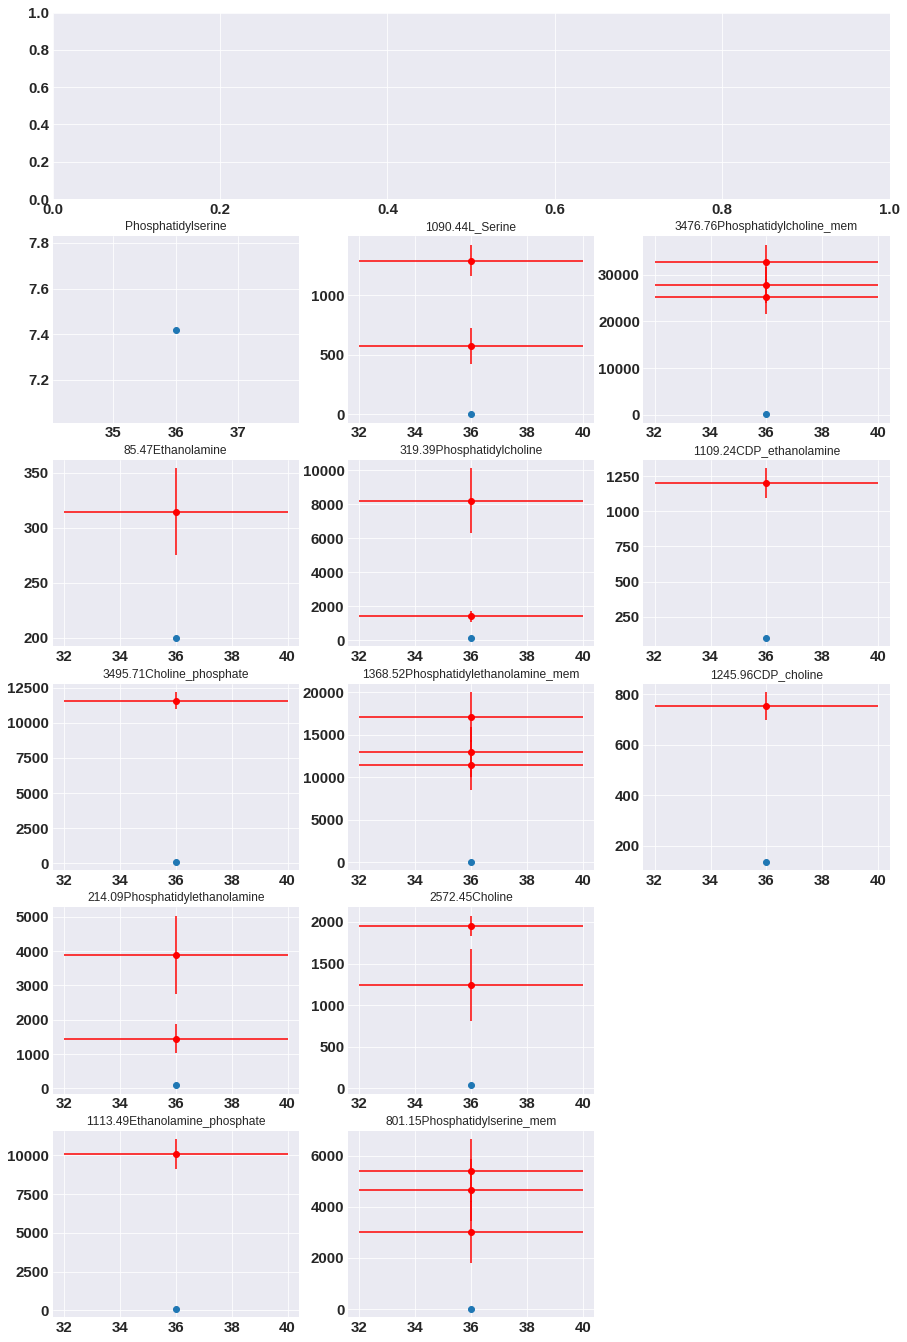

In [10]:
fig = plt.figure(figsize=(15,24))
rows = 6
ncol= 3
nx, ny = (rows, ncol)
x = np.linspace(0, rows-1, nx)
y = np.linspace(0, ncol-1, ny)

xv, yv = np.meshgrid(x, y)
coor_list = np.column_stack((xv.ravel(),yv.ravel()))
coor_list = [x for x in coor_list if x[0] != 0]
    
ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)
for it, col in enumerate(simu_p.columns):
    
    cor=(int(coor_list[it][0]),int(coor_list[it][1]))
    color = 'tab:blue'
    ax2 = plt.subplot2grid((rows, ncol), cor)
    ax2.scatter(x=[129600/3600], y=simu_p[col])
    ax2.set_title(col)
    if col in scatter_dic:
        num = "{:.2f}".format(sqd_d[col])
        ax2.set_title(num+ col)
        scatter_amount = np.asarray(scatter_dic[col]['values']) 
        scatter_std = np.asarray(scatter_dic[col]['std'])

        ax2.errorbar(x=[129600/3600]*len(scatter_amount[0]), y=scatter_amount[0],
                     xerr=4, fmt='o', color='red', yerr=scatter_std[0]
                    )

In [11]:
def plot_wth_parameters(model, parameters:dict, name:str):
    
    model.resetToOrigin()
    
    model = set_model_parameters(model, parameters)
    try:
        model.steadyState()
    except RuntimeError:
        print(esti)
        return None
    
    res = model.simulate()
    
    simu_p = simulation_to_panda(model, res[-1::])
    simu_d = simu_p[-1::].to_dict('list')
    sqd_sum, names = compute_sqd_distance(simu_d, scatter_dic)
    sqd_d = dict(zip(names, sqd_sum))
    
    fig = plt.figure(figsize=(15,24))
    rows = 6
    ncol= 3
    nx, ny = (rows, ncol)
    x = np.linspace(0, rows-1, nx)
    y = np.linspace(0, ncol-1, ny)

    xv, yv = np.meshgrid(x, y)
    coor_list = np.column_stack((xv.ravel(),yv.ravel()))
    coor_list = [x for x in coor_list if x[0] != 0]

    ax1 = plt.subplot2grid((rows, ncol), (0, 0), colspan=3)
    ax1.set_title(name + " {:.2e}".format(sqd_sum.sum()))
    for it, col in enumerate(simu_p.columns):

        cor=(int(coor_list[it][0]),int(coor_list[it][1]))
        color = 'tab:blue'
        ax2 = plt.subplot2grid((rows, ncol), cor)
        ax2.scatter(x=[129600/3600], y=simu_p[col])
        ax2.set_title(col)
        
        if col in scatter_dic:
            num = "{:.3e}".format(sqd_d[col])
            ax2.set_title(num + col)
            scatter_amount = np.asarray(scatter_dic[col]['values']) 
            scatter_std = np.asarray(scatter_dic[col]['std'])

            ax2.errorbar(x=[129600/3600]*len(scatter_amount[0]), y=scatter_amount[0],
                         xerr=0, fmt='o', color='red', yerr=scatter_std[0])
            

def set_model_parameters(model, params, excluded_values=[]):
    no_names = excluded_values
    for param_id in params: 
        if any(x in param_id for x in no_names):
            continue
        else:
            try:
                model[param_id] = params[param_id]
                # print(model[param_id])
            except RuntimeError:
                print('could not set parameter : {0}'.format(param_id))
                continue
            except TypeError:
                #print('try to set {0} to {1}'.format(model[param_id]),params[param_id])
                print(format(model[param_id]))  # 
                print(format(params[param_id]))
    return model

In [12]:
files = os.listdir(datapath)
files = [file for file in files if file.endswith('paras.txt')]
#files = [file for file in files if file.startswith('2020')]
files= sorted(files)
files

['20210811-10:41:561whole_paras.txt',
 '20210812-09:47:291whole_paras.txt',
 '20210812-09:49:321whole_paras.txt',
 '20210812-09:50:261whole_paras.txt',
 '20210812-09:53:011whole_paras.txt',
 '20210812-09:56:101whole_paras.txt',
 '20210812-10:09:421whole_paras.txt',
 '20210812-10:10:081whole_paras.txt',
 '20210812-10:25:041whole_paras.txt',
 '20210831-13:01:171whole_paras.txt',
 '20210914-12:11:141whole_paras.txt',
 '20210914-15:11:211whole_paras.txt',
 '20210915-14:17:391whole_paras.txt']

In [13]:
df = pd.DataFrame()
for file in files:
    filename = file
    path = datapath
    print(path + filename)
    with open(path+filename, 'rb') as g:
        data = pickle.loads(g.read())
    dnew = pd.DataFrame.from_dict(data[1], orient='index',columns=['Value'])
    #print(file)
    #print(np.log10(dnew['Value']))
    df[str(data[0])] = dnew['Value']

CMA_files/SS_PLModel_MA/20210811-10:41:561whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-09:47:291whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-09:49:321whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-09:50:261whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-09:53:011whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-09:56:101whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-10:09:421whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-10:10:081whole_paras.txt
CMA_files/SS_PLModel_MA/20210812-10:25:041whole_paras.txt
CMA_files/SS_PLModel_MA/20210831-13:01:171whole_paras.txt
CMA_files/SS_PLModel_MA/20210914-12:11:141whole_paras.txt
CMA_files/SS_PLModel_MA/20210914-15:11:211whole_paras.txt
CMA_files/SS_PLModel_MA/20210915-14:17:391whole_paras.txt


In [14]:
df.T.describe()

,k_R02055,k_R02037,k_EtOHamine_in,k_L_Serine_in,k_Choline_in,k_R01800,k_R01468,k_R01021,k_R02038,k_R01890,k_R02057,k_R01321,k_Serine_to_EtOHamine,k_PSSbe,k_TransportPC,k_TransportPE,k_TransportPS,k_SSTransportPC_mem,k_SSTransportPE_mem,k_SSTransportPS_mem
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000e+00,8.000000e+00
mean,2.497552e+06,8.458405e+06,2.841908e+05,5.543616e+05,2.219192e+05,4.766709e+06,1.214109e+07,1.048726e+07,3.487204e+05,3.615115e+06,4.500859e+05,11057.974995,1.966920e+06,2.192866e+07,4.384502e+06,1.946404e+05,6.331880e+06,708.176194,3.269832e+06,5.798789e+06
std,7.026993e+06,1.709098e+07,6.478662e+05,1.114466e+06,5.076109e+05,9.465208e+06,2.040506e+07,2.948732e+07,9.843100e+05,1.010851e+07,1.249181e+06,31150.248681,4.588782e+06,4.039898e+07,1.074423e+07,5.504422e+05,1.761167e+07,1337.579938,9.248414e+06,1.298709e+07
min,1.104954e-02,8.236531e-02,6.618318e-02,1.487890e+00,1.029833e-01,7.064389e-02,3.890600e-02,1.045906e-02,1.554496e-02,1.041682e-02,1.010366e-02,0.126912,7.666045e-01,9.478004e-02,5.790034e-06,2.286427e-08,1.420129e-07,0.000029,4.212550e-07,7.162076e-08
25%,2.323662e-01,6.445151e+01,1.294083e+00,2.137394e+02,1.332076e+00,6.074416e+01,2.648900e+04,2.947594e-02,2.720710e+00,2.063350e+00,9.638565e-01,0.571482,1.137669e+01,5.110067e+00,1.749935e-02,2.534167e-04,9.596686e-06,0.003591,1.986036e-03,6.957858e+01
50%,3.200378e+00,9.157790e+02,1.469291e+01,3.898132e+03,3.090917e+04,1.866479e+03,7.358489e+05,2.035737e+02,2.846882e+01,2.240248e+03,5.418796e+00,26.727824,6.685460e+03,1.609429e+05,2.072070e+04,3.512983e-02,1.807152e-02,0.011455,4.978108e-02,4.018107e+02
75%,2.334755e+04,5.327627e+06,1.159862e+05,4.568074e+05,1.005842e+05,3.889146e+06,1.457325e+07,1.229868e+05,2.249495e+03,7.416223e+04,1.606703e+04,92.226841,6.647638e+05,2.112712e+07,1.875068e+06,5.323158e+01,1.988001e+05,584.295754,6.311774e+01,2.428188e+06
max,1.988829e+07,4.682056e+07,1.849479e+06,3.190751e+06,1.470067e+06,2.684442e+07,4.939165e+07,8.346382e+07,2.784762e+06,2.863126e+07,3.541263e+06,88150.720265,1.309784e+07,9.174786e+07,3.086796e+07,1.556915e+06,4.991422e+07,3338.822631,2.615849e+07,3.690207e+07


In [15]:
df

,4144292583.892778,8.739723596451679e+20,1e+30,4.9306697037156864e+17,7221.781097976794,7016.894176313135,2729.700175146195,438.28680422225864
k_R02055,2.064451e+00,1.988829e+07,6.377365e+02,4.336304e+00,9.147699e+04,2.680553e-01,1.104954e-02,1.252990e-01
k_R02037,2.515793e+01,7.754937e+01,8.236531e-02,2.328842e+05,4.682056e+07,2.061186e+07,7.292895e+02,1.102269e+03
k_EtOHamine_in,4.040510e+05,1.440309e+01,1.996454e+04,1.849479e+06,1.628892e+00,2.896534e-01,6.618318e-02,1.498273e+01
k_L_Serine_in,2.844585e+02,2.955860e+05,3.190751e+06,3.850698e+03,1.487890e+00,3.945566e+03,1.582296e+00,9.404717e+05
k_Choline_in,1.029833e-01,1.640309e+05,5.777407e+04,7.943529e+04,7.607077e-01,1.522532e+00,4.044264e+03,1.470067e+06
k_R01800,1.827952e+01,2.684442e+07,7.489904e+01,7.064389e-02,6.611749e+02,2.135577e+06,9.149855e+06,3.071783e+03
k_R01468,4.019853e+07,2.128396e+01,6.031491e+06,6.793188e+04,1.403766e+06,4.939165e+07,3.890600e-02,3.531157e+04
k_R01021,4.047790e+05,1.045906e-02,8.346382e+07,3.275212e+02,1.955639e-02,3.278246e-02,7.962611e+01,2.905601e+04
k_R02038,2.028653e+03,1.554496e-02,2.912021e+03,5.243679e+01,4.500850e+00,3.403302e+00,2.784762e+06,6.729336e-01
k_R01890,4.467328e+03,2.740296e+00,2.863126e+07,2.794453e+05,3.250880e-02,1.041682e-02,1.316744e+01,5.734536e+03


7221.781097976794


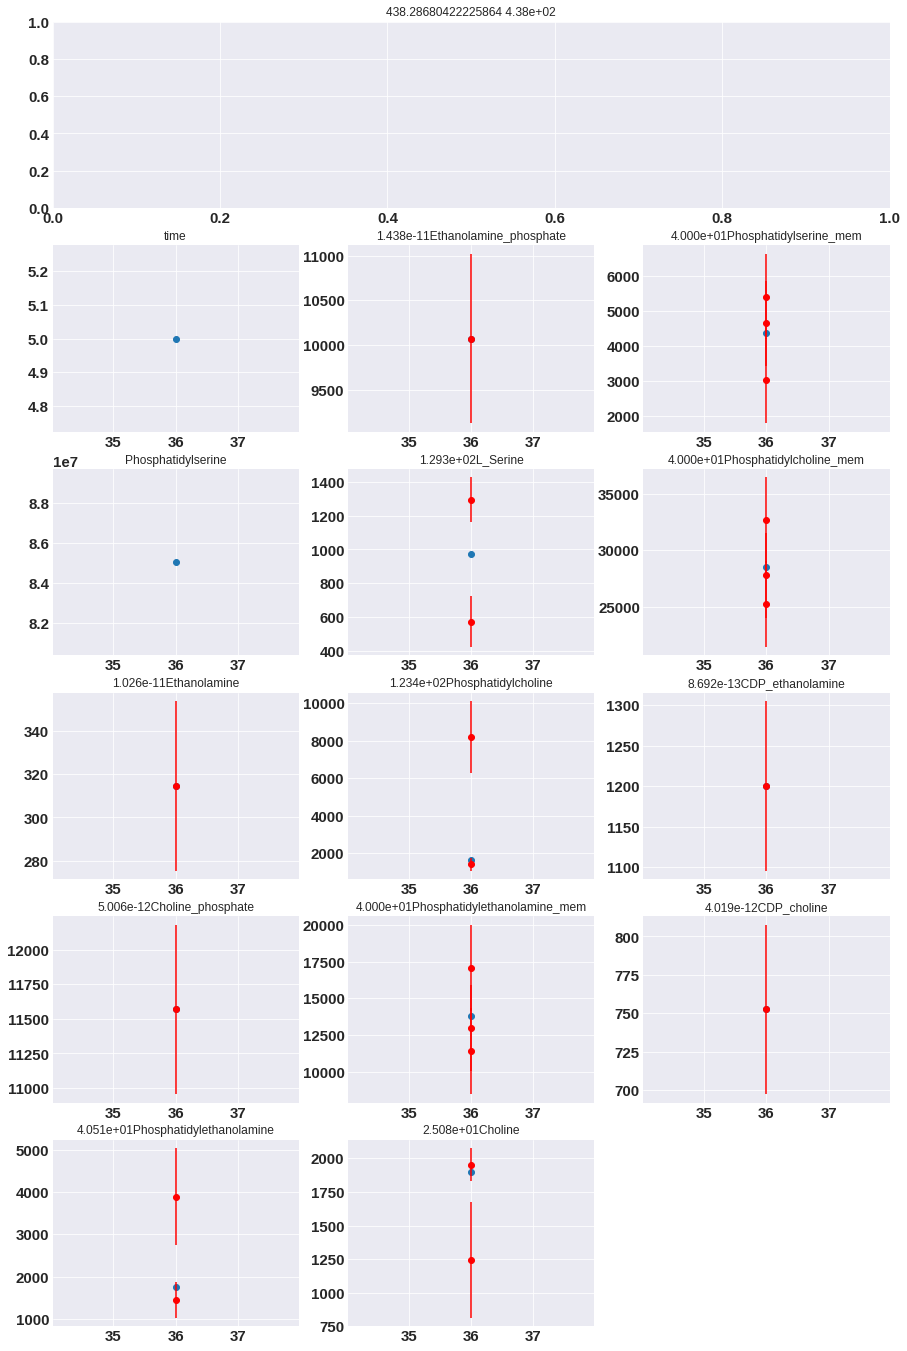

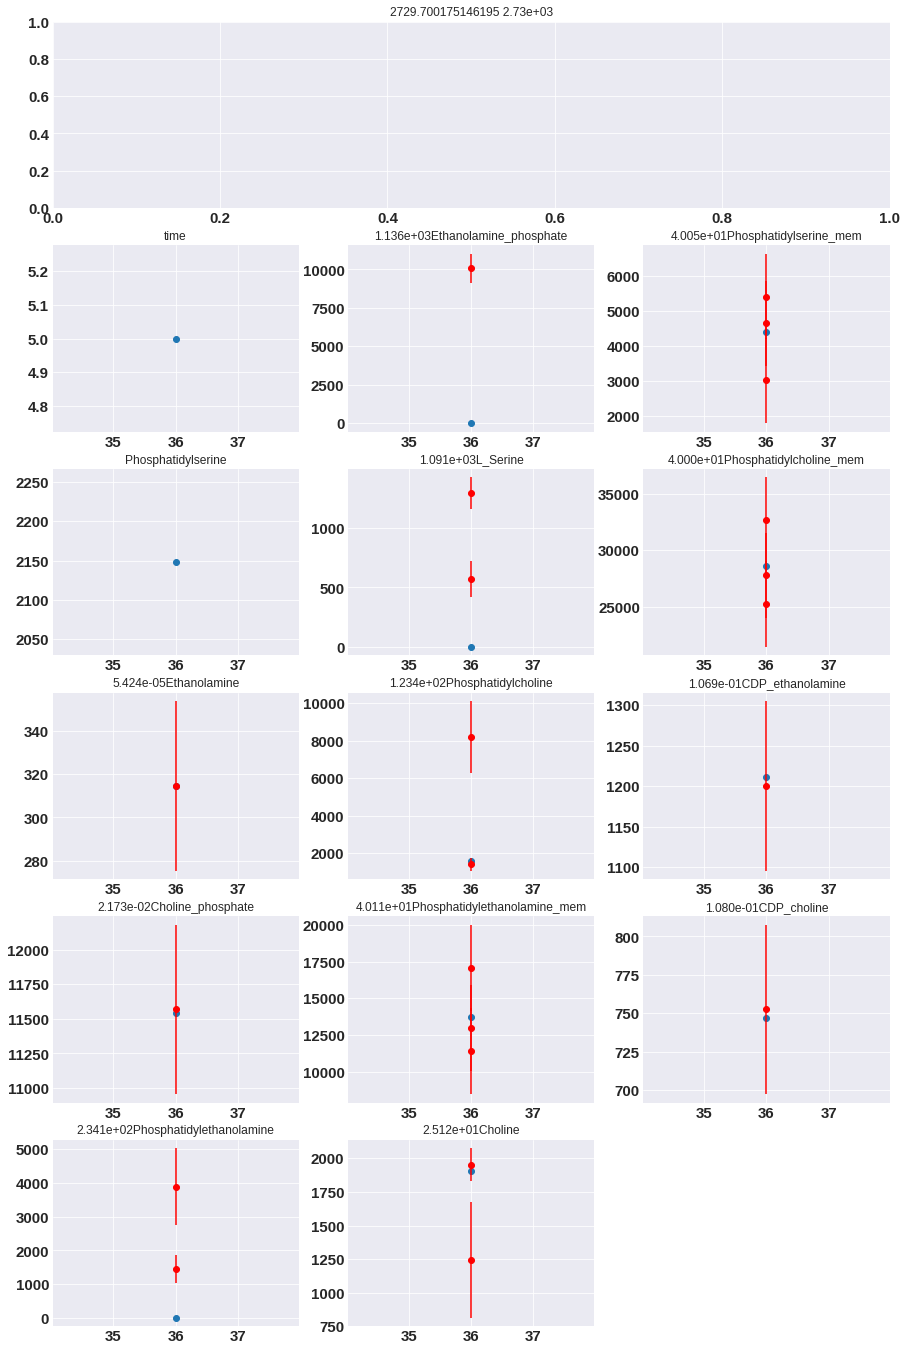

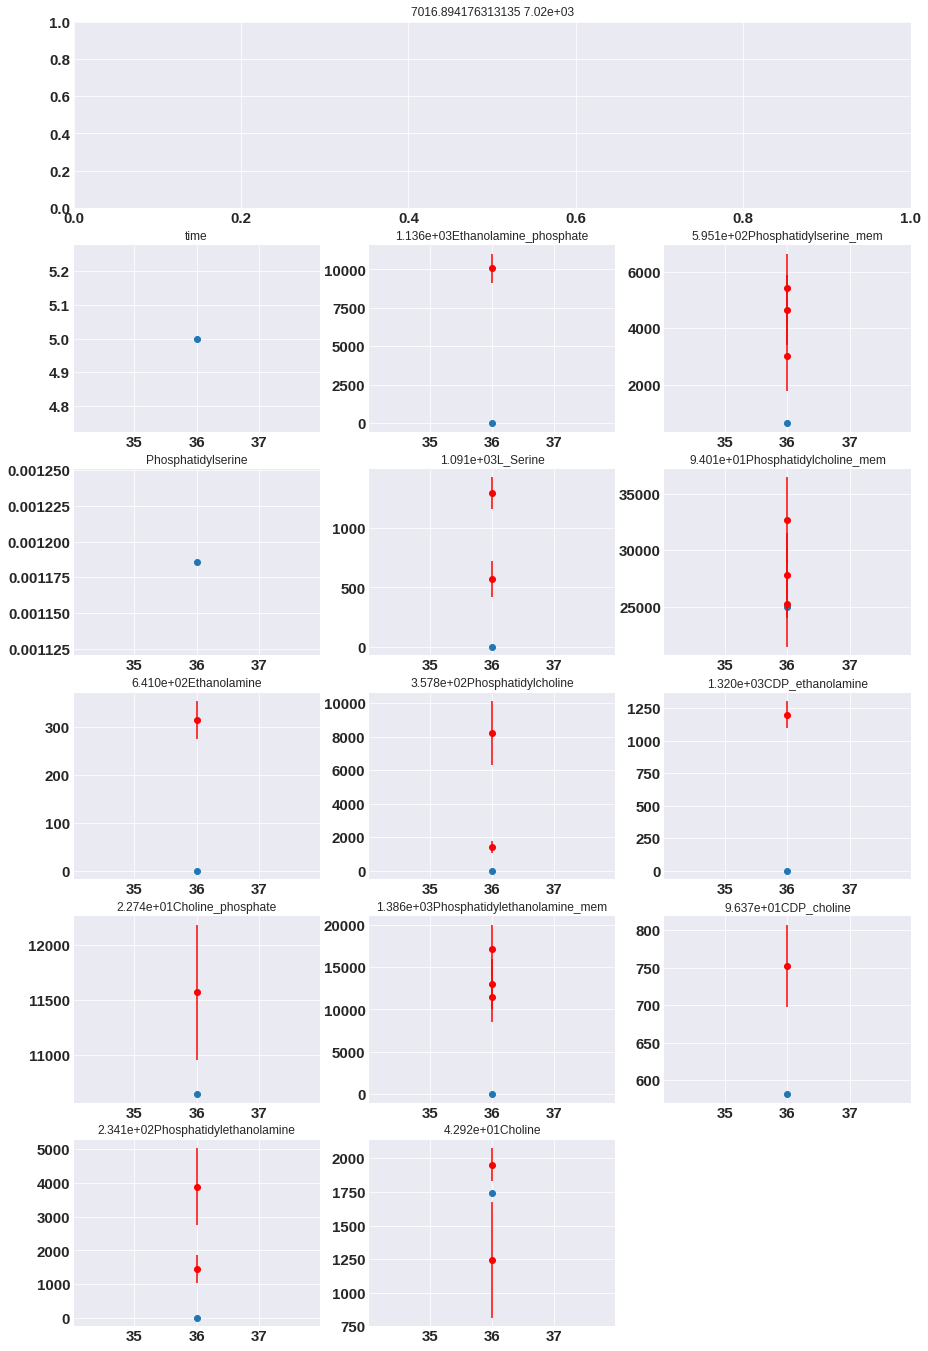

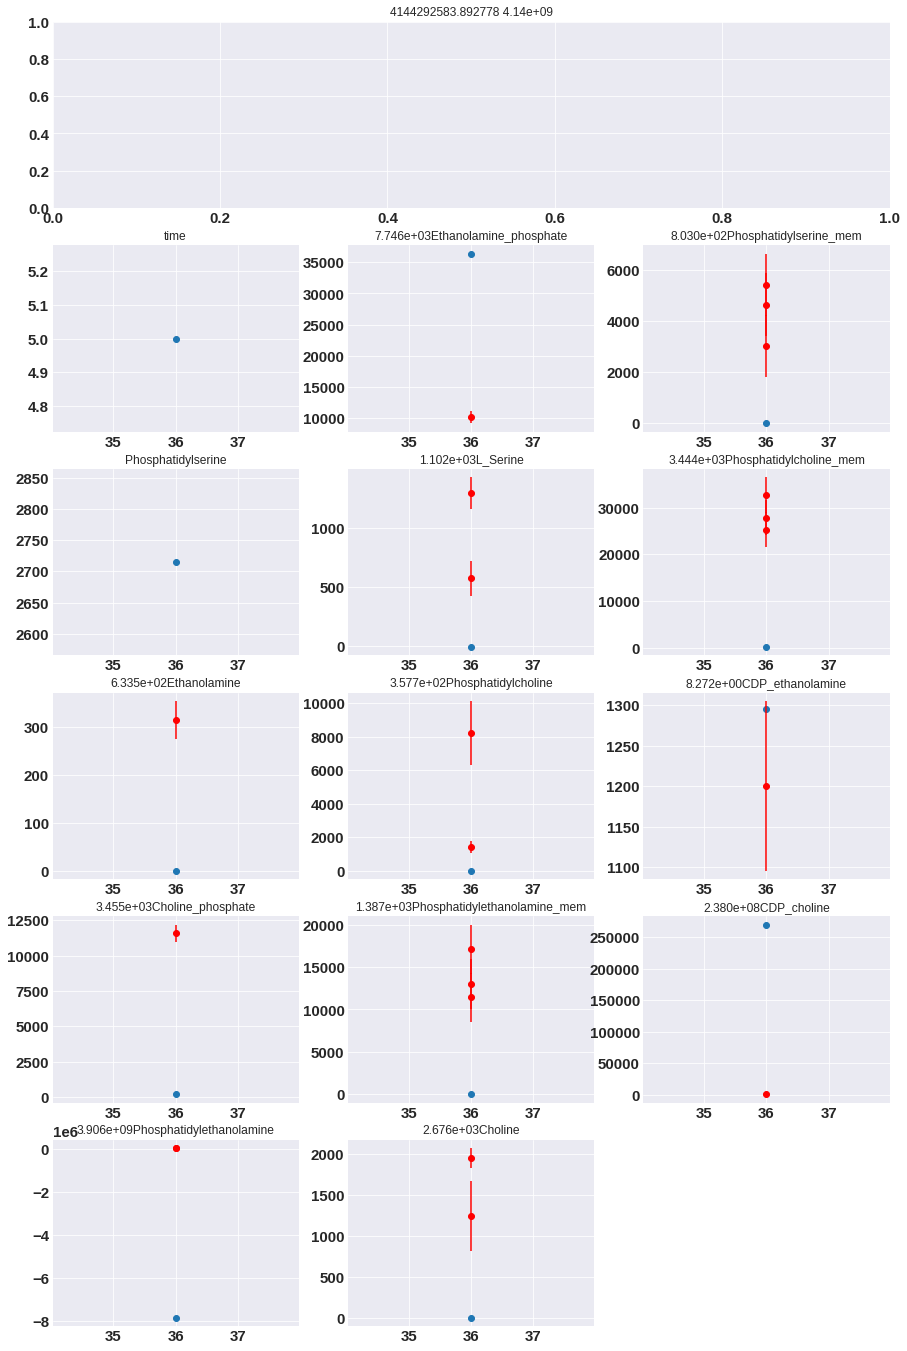

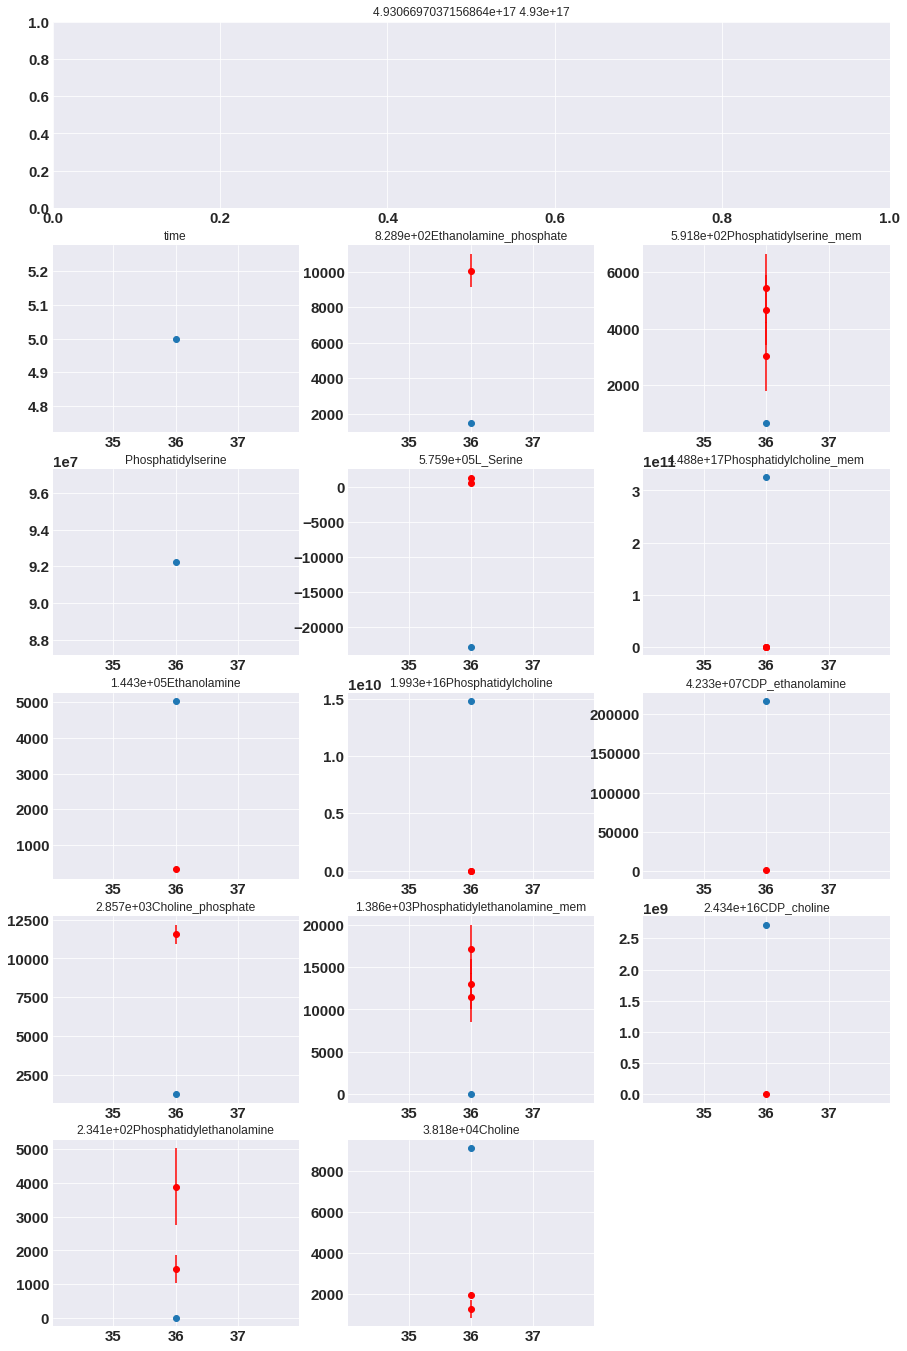

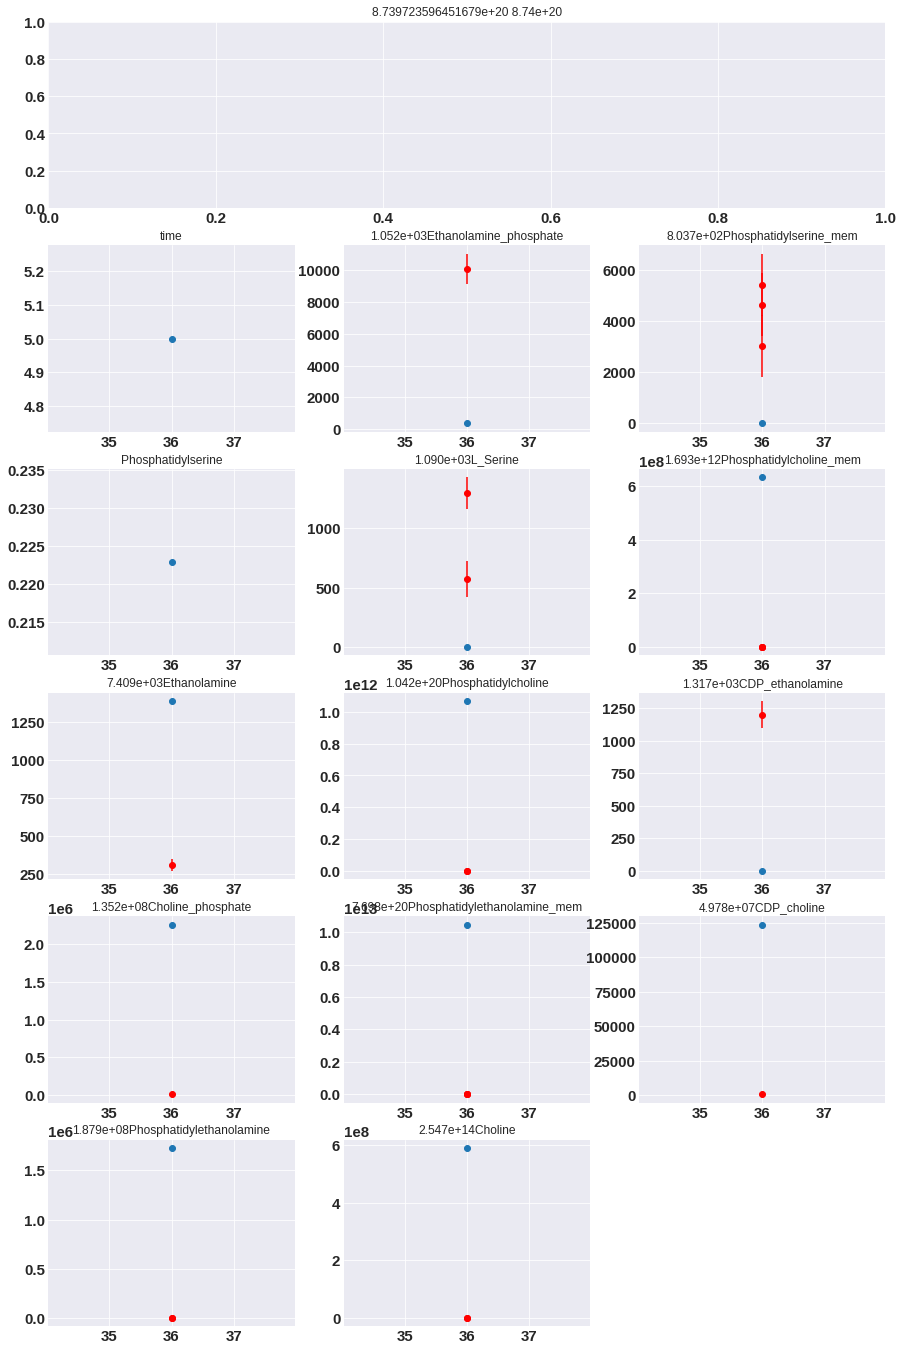

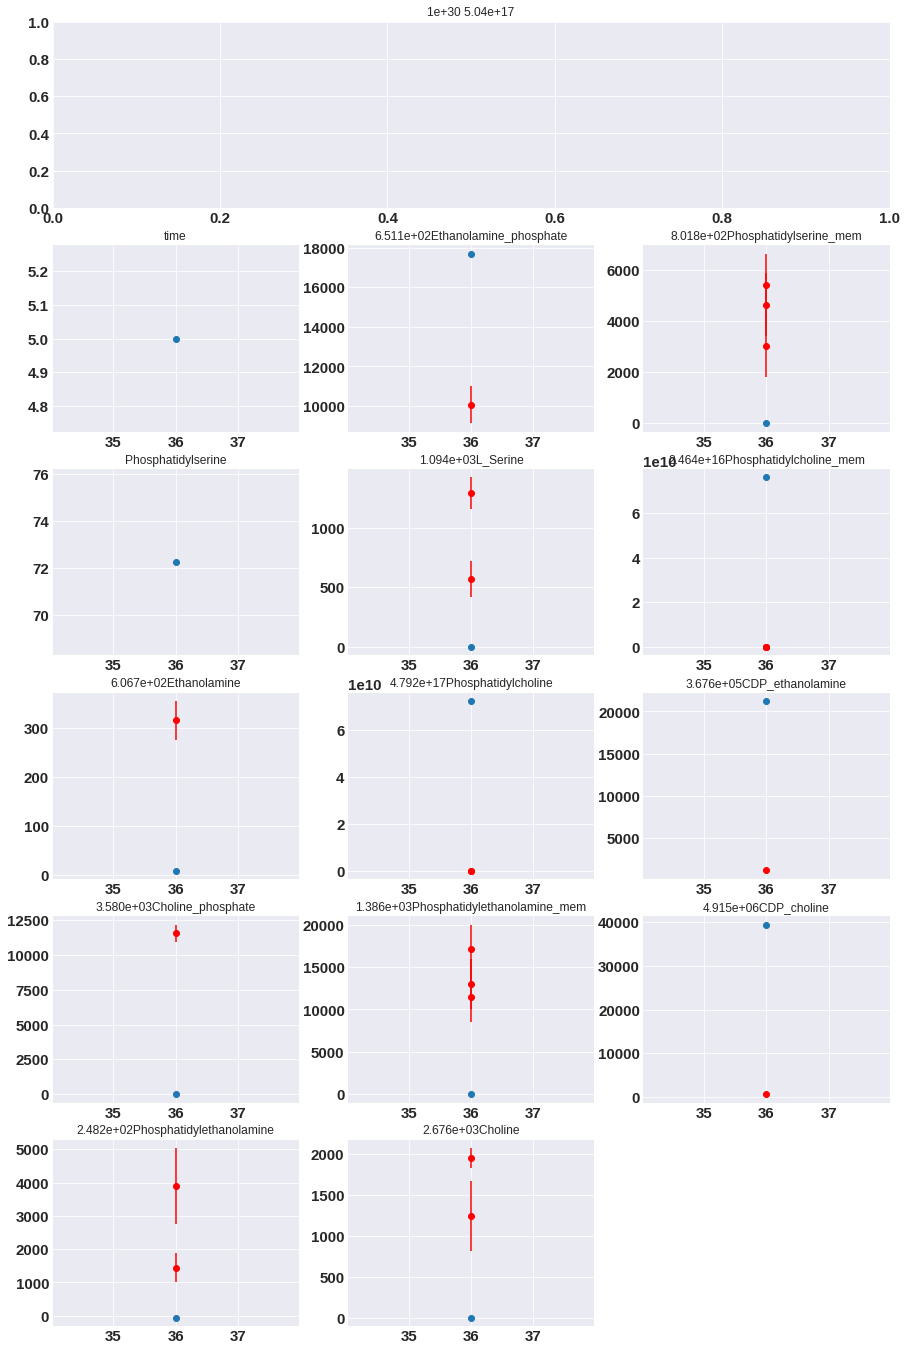

In [16]:
scores = list(map(float, df.columns.to_list()))
for esti in sorted(scores):
    plot_wth_parameters(model, df[str(esti)].to_dict(), str(esti))

In [27]:
results = list(map(float, df.columns.to_list()))
sorted(results)
print(results)
esti = results[-1]
print(esti)
model.resetToOrigin()
model = set_model_parameters(model, df[str(esti)].to_dict())
model.steadyState()
res = model.simulate()
res_p = simulation_to_panda(model, res)
res_p


[4144292583.892778, 8.739723596451679e+20, 1e+30, 4.9306697037156864e+17, 7221.781097976794, 7016.894176313135, 2729.700175146195, 438.28680422225864]
438.28680422225864


,time,Phosphatidylserine,Ethanolamine,Choline_phosphate,Phosphatidylethanolamine,Ethanolamine_phosphate,L_Serine,Phosphatidylcholine,Phosphatidylethanolamine_mem,Choline,Phosphatidylserine_mem,Phosphatidylcholine_mem,CDP_ethanolamine,CDP_choline
0,0.0,8.504317e+07,314.693881,11567.799811,1746.386499,10075.179724,975.821358,1604.441754,13835.918201,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
1,0.1,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
2,0.2,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
3,0.3,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
4,0.4,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
5,0.5,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
6,0.6,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
7,0.7,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
8,0.8,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906
9,0.9,8.504317e+07,314.693881,11567.799811,1746.385867,10075.179724,975.821358,1604.441754,13835.913189,1900.825961,4363.836111,28577.737427,1200.314787,752.528906


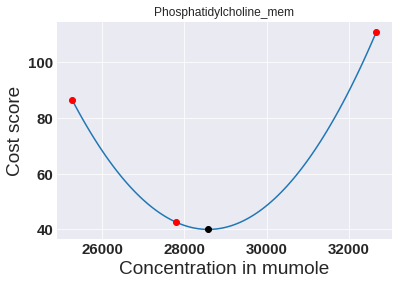

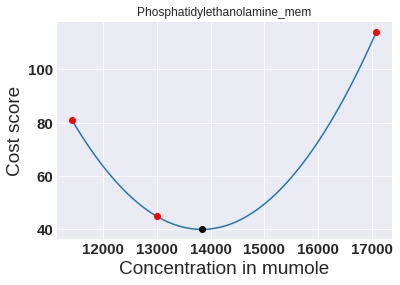

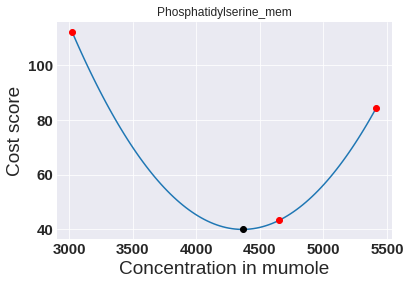

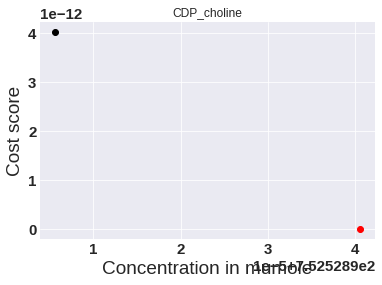

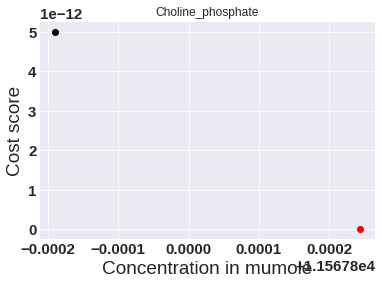

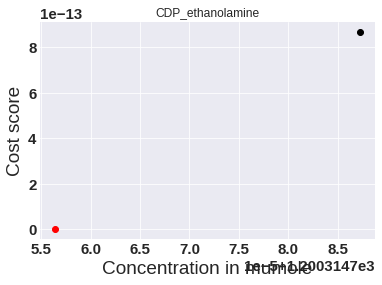

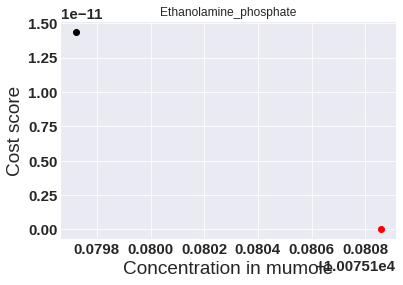

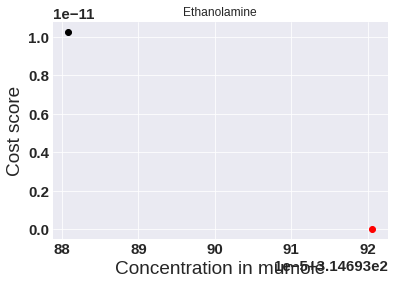

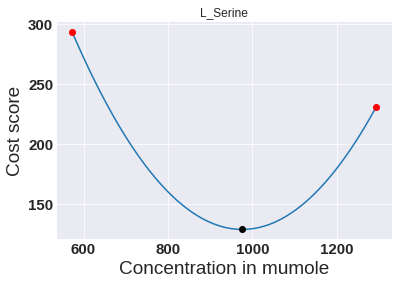

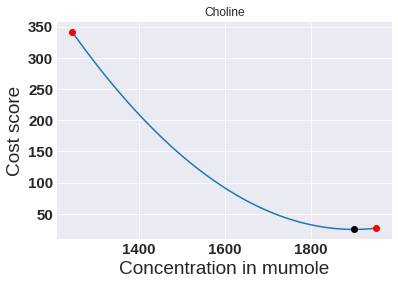

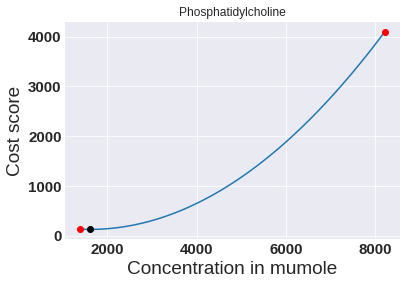

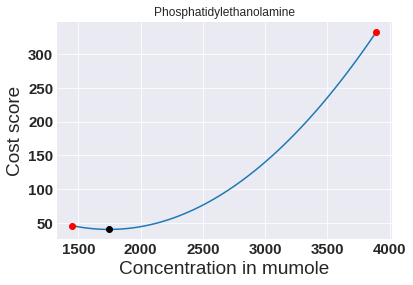

In [79]:
scores = list(map(float, df.columns.to_list()))
for esti in sorted(scores)[:1]:
    
    model.resetToOrigin()
    parameters = df[str(esti)].to_dict()
    model = set_model_parameters(model, parameters)
    try:
        model.steadyState()
    except RuntimeError:
        print(esti)
        continue
    
    res = model.simulate()
    
    simu_p = simulation_to_panda(model, res[-1::])
    simu_d = simu_p[-1::].to_dict('list')
    
    for mole in scatter_dic:
        ar = np.linspace(min(scatter_dic[mole]['values'][0]), max(scatter_dic[mole]['values'][0]), num=100)
        plt.plot(ar, calc_scores(ar, mole, scatter_dic))

        scatter_amount = np.asarray(scatter_dic[mole]['values']) 
        scatter_std = np.asarray(scatter_dic[mole]['std'])

        plt.errorbar(x=scatter_amount[0], y=calc_scores(scatter_amount[0], mole, scatter_dic),
                             xerr=0, fmt='o', color='red')
        
        plt.errorbar(x=simu_d[mole], y=calc_scores(simu_d[mole], mole, scatter_dic),
                             xerr=0, fmt='o', color='black')
        plt.xlabel('Concentration in mumole')
        plt.ylabel('Cost score')
        plt.title(mole)
        plt.show()

Minimum element from Numpy Array :  40.00000189858561


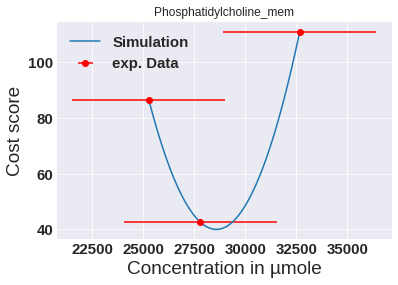

Minimum element from Numpy Array :  40.00000114248587


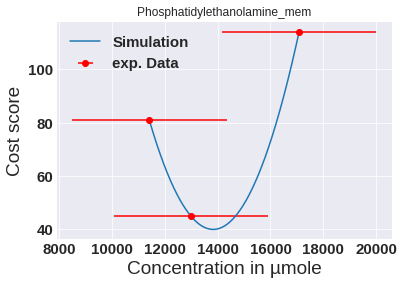

Minimum element from Numpy Array :  40.000020874571334


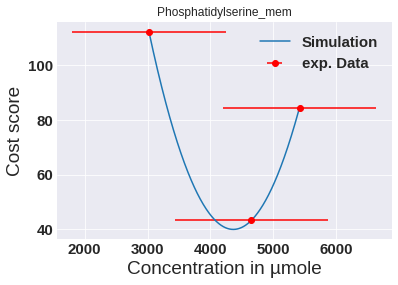

Minimum element from Numpy Array :  0.0


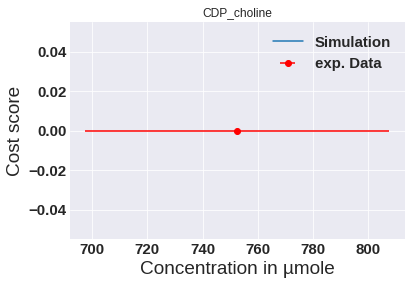

Minimum element from Numpy Array :  0.0


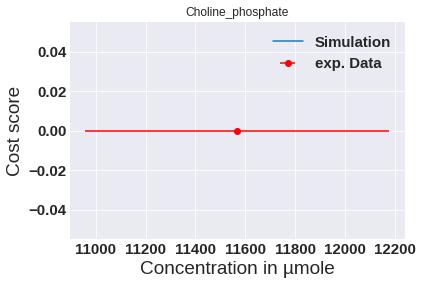

Minimum element from Numpy Array :  0.0


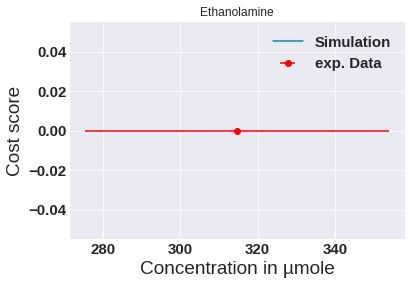

Minimum element from Numpy Array :  0.0


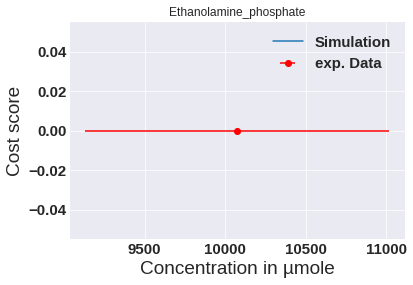

Minimum element from Numpy Array :  0.0


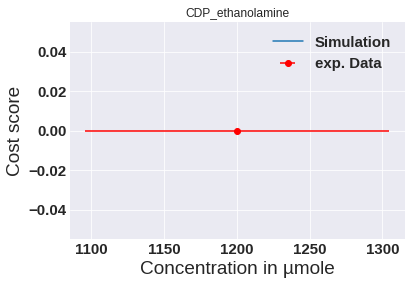

Minimum element from Numpy Array :  129.31466967187615


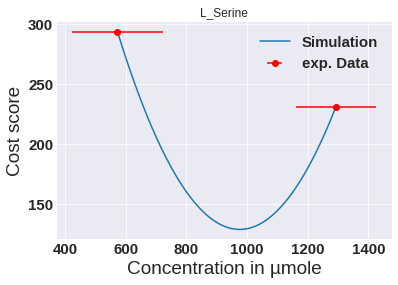

Minimum element from Numpy Array :  25.07557139038882


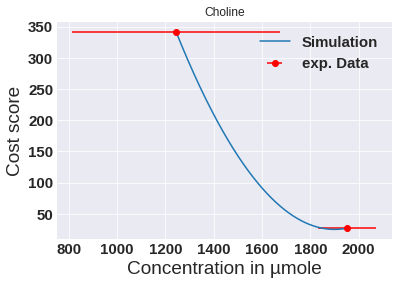

Minimum element from Numpy Array :  123.3872218600666


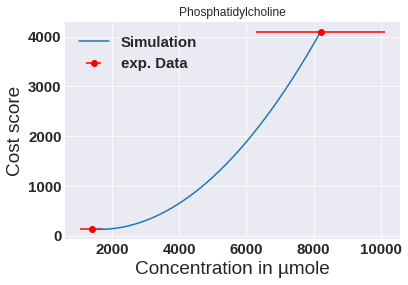

Minimum element from Numpy Array :  40.50959161591757


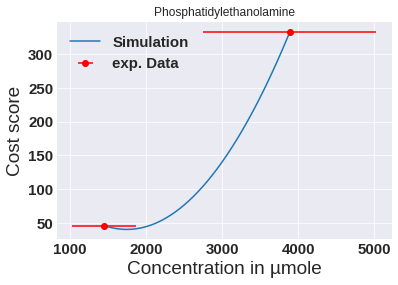

[ 40.          40.          40.           0.           0.
   0.           0.           0.         129.31457397  25.0755392
 123.38718865  40.50950242]
438.28680425229993


In [62]:
#minArray = np.zeros(len(scatter_dic))
for it, mole in enumerate(scatter_dic):
        scatter_amount = np.asarray(scatter_dic[mole]['values']) 
        scatter_std = np.asarray(scatter_dic[mole]['std'])
        scatter_scores = calc_scores(scatter_amount[0], mole, scatter_dic)
        
        plt.errorbar(x=scatter_amount[0], y=scatter_scores,
                             xerr=scatter_std[0], fmt='o', color='red')
        
        ar = np.linspace(min(scatter_dic[mole]['values'][0]), max(scatter_dic[mole]['values'][0]), num=1000)
        ar_scores = calc_scores(ar, mole, scatter_dic)
        # Find Minimum
        minElement = np.amin(ar_scores)
        #minArray[it]= minElement
        print('Minimum element from Numpy Array : ', minElement)
        #result = np.argmin(ar_scores)
        #print(result)
        
        plt.plot(ar, ar_scores)


        plt.legend(['Simulation','exp. Data'])
        plt.xlabel('Concentration in µmole')
        plt.ylabel('Cost score')
        plt.title(mole)
        plt.show()
print(minArray)
print(minArray.sum())

In [29]:
def calc_scores(simulation_nums, molecule, data, normalized=True, factor=1e1):

    scores = np.zeros(len(simulation_nums))
    alex_bias_lst = ['DAG', 'Phosphatidylserine_mem',
                     'Phosphatidylethanolamine_mem', 'Phosphatidylcholine_mem']

    if molecule == 'time':
        return None
    for ar_pos,simulation_num in enumerate(simulation_nums):
        dist = 0.

        bias_fac = 1
        if molecule in alex_bias_lst:
            bias_fac = 2
        # iterate through the measured timepoints, thus finer evaluation of fit
        for i, values in enumerate(data[molecule]['values']):
            for pos, value in enumerate(values):
                # data entries empty as no literature value found, thus skipped
                if np.isnan(value):
                    continue
                if normalized:
                    dist += np.nansum(((value
                            - simulation_num)**2  # noqa: E128
                            * bias_fac)  # noqa:E128
                            / data[molecule]['std'][i][pos]**2)   # noqa: E128

                else:
                    dist += np.nansum(bias_fac*(value
                            - simulation_result_dict[molecule][i])**2)  # noqa:E128
        scores[ar_pos] = dist * factor
    return scores

In [39]:
scatter_dic

{'Phosphatidylcholine_mem': {'values': [[25268.41448189764,
    27801.87265917603,
    32662.92134831461]],
  'std': [[3757.8126725459665, 3757.8126725459665, 3757.8126725459665]]},
 'Phosphatidylethanolamine_mem': {'values': [[11422.72159800251,
    13002.247191011238,
    17082.771535580527]],
  'std': [[2920.666171768269, 2920.666171768269, 2920.666171768269]]},
 'Phosphatidylserine_mem': {'values': [[3022.2222222222213,
    5416.85393258427,
    4652.434456928839]],
  'std': [[1223.1237395306018, 1223.1237395306018, 1223.1237395306018]]},
 'CDP_choline': {'values': [[752.5289405544399]],
  'std': [[55.10253234142428]]},
 'Choline_phosphate': {'values': [[11567.80024323354]],
  'std': [[611.35202360745]]},
 'CDP_ethanolamine': {'values': [[1200.3147564215446]],
  'std': [[104.48335703565778]]},
 'Ethanolamine_phosphate': {'values': [[10075.180857009856]],
  'std': [[945.3256112749988]]},
 'Ethanolamine': {'values': [[314.69392059549307]],
  'std': [[39.305643837223634]]},
 'L_Serine